# **Objective: Customer Churn Analysis**

Objective:
The goal of this analysis is to explore customer churn patterns and identify key factors influencing churn in a subscription-based business.

 By analyzing demographic, service, and payment-related data, we aim to uncover insights that help businesses reduce customer attrition and improve retention strategies.

This project involves:

✔️ Cleaning and preprocessing customer data.

✔️ Performing exploratory data analysis (EDA) to identify trends.

✔️ Analyzing the impact of contract type, payment method, and internet service on churn.

✔️ Providing business recommendations to improve customer retention.

# **Importing Essential Libraries**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("/content/customer_churn_dataset.csv")
df.head()

,Customer ID,Gender,Age,Subscription Length (Months),Monthly Charges,Total Charges,Payment Method,Contract Type,Internet Service,Customer Support Calls,Churn
0,CUST0001,Male,71,23,63.42,1458.66,Bank Transfer,Monthly,DSL,1,No
1,CUST0002,Female,34,26,81.44,2117.44,Credit Card,Monthly,DSL,3,No
2,CUST0003,Male,26,21,68.19,1431.99,Credit Card,Two-Year,DSL,9,No
3,CUST0004,Male,50,22,25.73,566.06,PayPal,Monthly,No Internet,9,Yes
4,CUST0005,Male,70,58,42.47,2463.26,PayPal,One-Year,Fiber Optic,8,No


In [92]:
df.shape

(1000, 11)

In [93]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
Subscription Length (Months),0
Monthly Charges,0
Total Charges,0
Payment Method,0
Contract Type,0
Internet Service,0
Customer Support Calls,0


In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
df.dtypes

,0
Customer ID,object
Gender,object
Age,int64
Subscription Length (Months),int64
Monthly Charges,float64
Total Charges,float64
Payment Method,object
Contract Type,object
Internet Service,object
Customer Support Calls,int64


In [96]:
df.describe()

,Age,Subscription Length (Months),Monthly Charges,Total Charges,Customer Support Calls
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.394000,30.140000,54.301900,1608.514980,4.560000
std,17.818256,17.015167,26.032029,1268.734465,2.917003
min,18.000000,1.000000,10.020000,12.260000,0.000000
25%,34.000000,15.000000,31.132500,576.785000,2.000000
50%,49.000000,30.000000,54.250000,1283.720000,5.000000
75%,64.000000,45.000000,76.965000,2361.287500,7.000000
max,79.000000,59.000000,99.970000,5875.810000,9.000000


**Gender** **vs** **Churn**

In [97]:
pd.crosstab(df["Gender"],df["Churn"],margins=True,margins_name="Total")

Churn,No,Yes,Total
Gender,,,
Female,327,183,510
Male,341,149,490
Total,668,332,1000


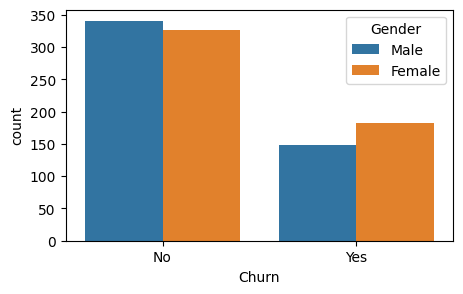

In [98]:
plt.figure(figsize=(5,3))
sns.countplot(x="Churn",data=df,hue="Gender")
plt.show()

**Analysis** **on** **Gender** **Categories**

In [99]:
df["Gender"].value_counts()

,count
Gender,
Female,510
Male,490


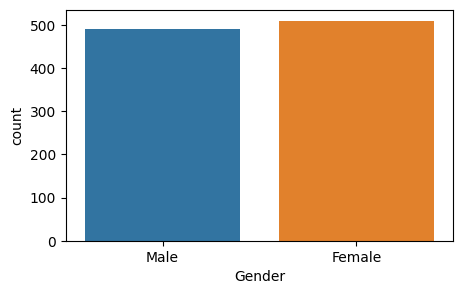

In [100]:
plt.figure(figsize=(5,3))
sns.countplot(x="Gender",data=df,hue="Gender")
plt.show()

**Analysis on Payment type Categories**

In [101]:
df["Payment Method"].value_counts()

,count
Payment Method,
Credit Card,354
PayPal,325
Bank Transfer,321


<Axes: xlabel='Payment Method', ylabel='count'>

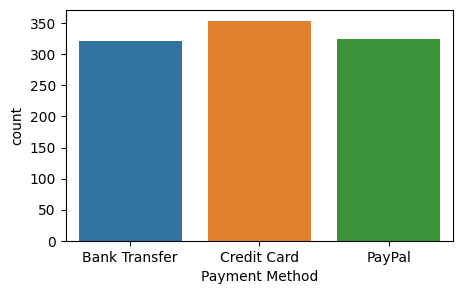

In [102]:
plt.figure(figsize=(5,3))
sns.countplot(x="Payment Method",data=df,hue="Payment Method")

**Contract Type Analysis**

In [103]:
df["Contract Type"].value_counts()

,count
Contract Type,
Two-Year,346
One-Year,332
Monthly,322


<Axes: xlabel='Contract Type', ylabel='count'>

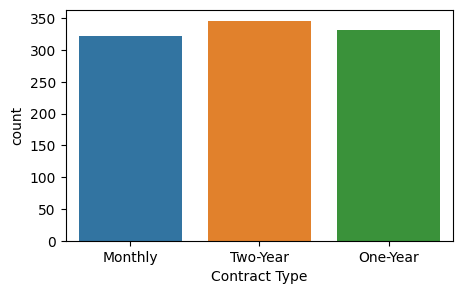

In [104]:
plt.figure(figsize=(5,3))
sns.countplot(x="Contract Type",data=df,hue="Contract Type")

**Internet Service Analysis**

In [105]:
df["Internet Service"].value_counts()

,count
Internet Service,
No Internet,350
Fiber Optic,330
DSL,320


<Axes: xlabel='Internet Service', ylabel='count'>

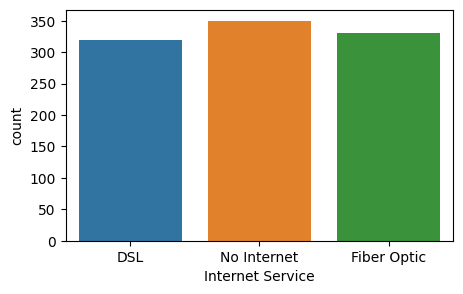

In [106]:
plt.figure(figsize=(5,3))
sns.countplot(x="Internet Service",data=df,hue="Internet Service")

# **Skewness of numerical columns**

In [107]:
for i in df.columns:
  if df[i].dtype != "object":
    skew = df[i].skew()
    print(f"the skewness of {i} is {skew}")

the skewness of Age is -0.024433935479630842
the skewness of Subscription Length (Months) is 0.0024152348989907287
the skewness of Monthly Charges is 0.010526849385634675
the skewness of Total Charges is 0.9479483419649009
the skewness of Customer Support Calls is -0.02110586746133976


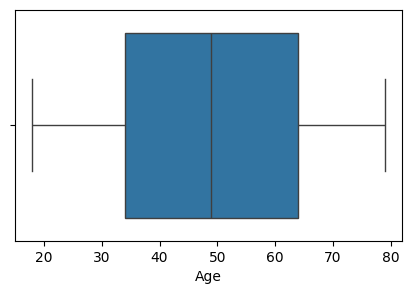

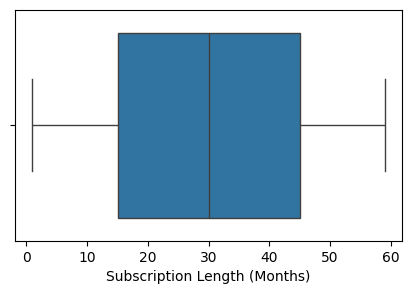

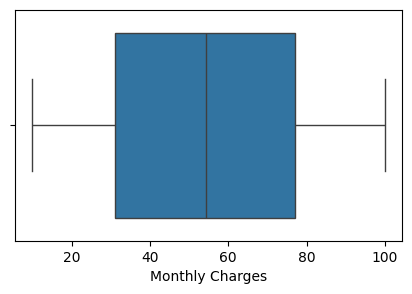

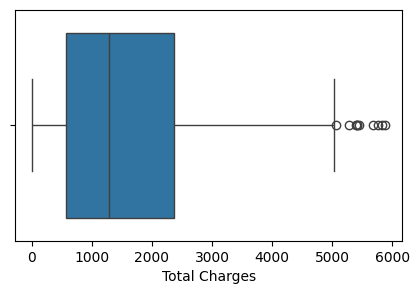

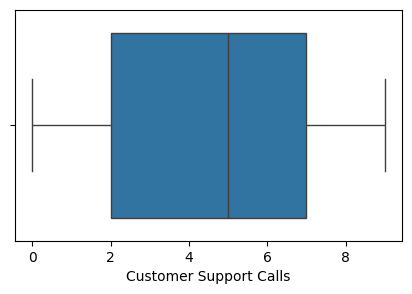

In [108]:
for i in df.columns:
  if df[i].dtype != "object":
    plt.figure(figsize=(5,3))
    sns.boxplot(x=i,data=df)
    plt.show()

In [109]:
q1 = df["Total Charges"].quantile(0.25)
q3 = df["Total Charges"].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*(iqr)

In [110]:
df = df[df["Total Charges"]<=upper]

In [111]:
df.shape

(990, 11)

# **Analysis on Numerical Columns**

**Average Age of each Gender**

In [112]:
df.groupby("Gender")["Age"].mean()

,Age
Gender,
Female,48.486111
Male,48.181070


**Average monthly subscription by age**

In [113]:
df.groupby("Gender")["Subscription Length (Months)"].mean()

,Subscription Length (Months)
Gender,
Female,29.327381
Male,30.438272


Mean of Age grouped by Gender:
Gender
Female    48.486111
Male      48.181070
Name: Age, dtype: float64



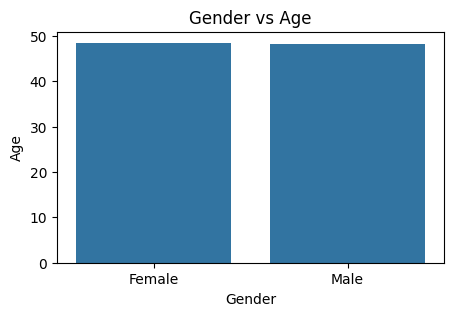

Mean of Subscription Length (Months) grouped by Gender:
Gender
Female    29.327381
Male      30.438272
Name: Subscription Length (Months), dtype: float64



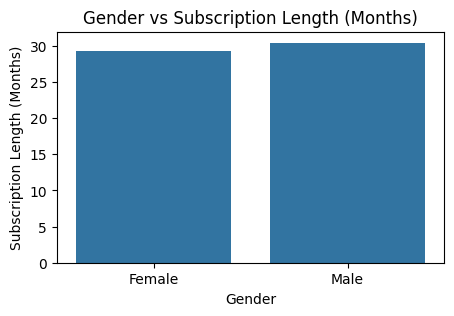

Mean of Monthly Charges grouped by Gender:
Gender
Female    54.83998
Male      52.85644
Name: Monthly Charges, dtype: float64



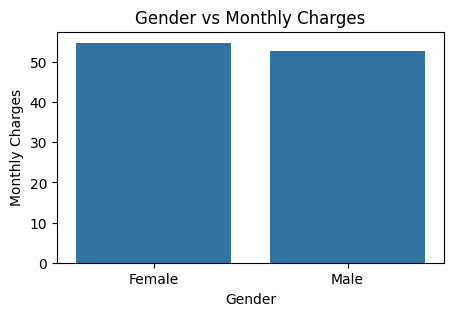

Mean of Total Charges grouped by Gender:
Gender
Female    1555.924643
Male      1582.677325
Name: Total Charges, dtype: float64



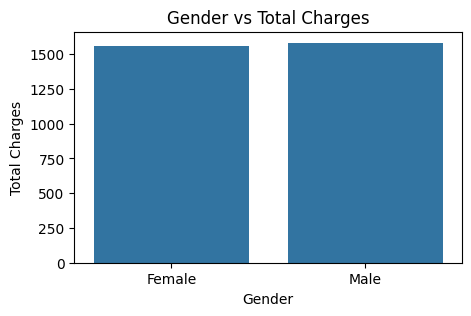

Crosstab of Payment Method vs Gender:
Payment Method  Bank Transfer  Credit Card  PayPal  All
Gender                                                 
Female                    147          190     167  504
Male                      172          161     153  486
All                       319          351     320  990



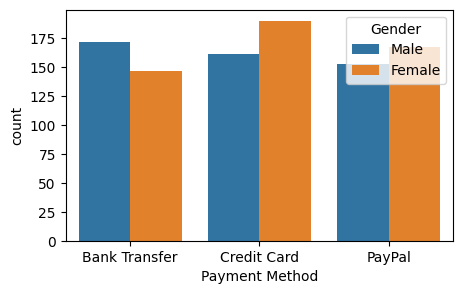

Crosstab of Contract Type vs Gender:
Contract Type  Monthly  One-Year  Two-Year  All
Gender                                         
Female             168       170       166  504
Male               154       156       176  486
All                322       326       342  990



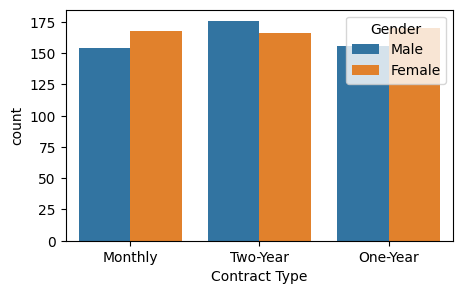

Crosstab of Internet Service vs Gender:
Internet Service  DSL  Fiber Optic  No Internet  All
Gender                                              
Female            165          173          166  504
Male              151          156          179  486
All               316          329          345  990



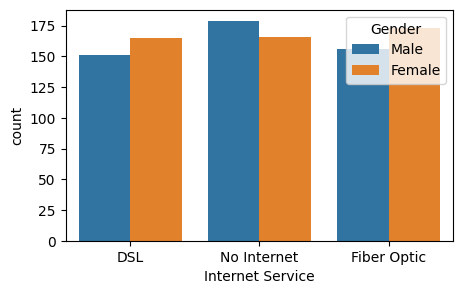

Mean of Customer Support Calls grouped by Gender:
Gender
Female    4.630952
Male      4.477366
Name: Customer Support Calls, dtype: float64



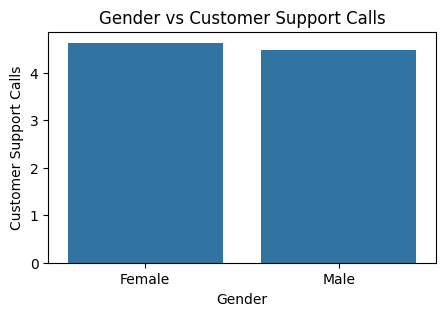

Crosstab of Churn vs Gender:
Churn    No  Yes  All
Gender               
Female  325  179  504
Male    337  149  486
All     662  328  990



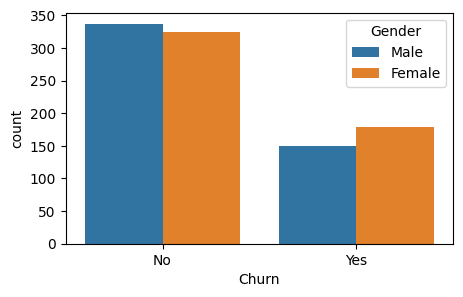

In [114]:
for i in df.columns:
    if i not in ["Gender", "Customer ID"]:
        if df[i].dtype in ["int64", "float64"]:
            result = df.groupby("Gender")[i].mean()
            print(f"Mean of {i} grouped by Gender:\n{result}\n")
            plt.figure(figsize=(5,3))
            sns.barplot(x=result.index, y=result.values)
            plt.xlabel("Gender")
            plt.ylabel(f"{i}")
            plt.title(f"Gender vs {i}")
            plt.show()
        else:
            result = pd.crosstab(df["Gender"], df[i],margins=True)
            print(f"Crosstab of {i} vs Gender:\n{result}\n")
            plt.figure(figsize=(5,3))
            sns.countplot(x=i,data=df,hue="Gender")
            plt.show()


**[Payment method,contract type,internet service] vs Churn Rate**

Crosstab of Payment Method vs Churn:
Churn            No  Yes  Total
Payment Method                 
Bank Transfer   207  112    319
Credit Card     241  110    351
PayPal          214  106    320
Total           662  328    990



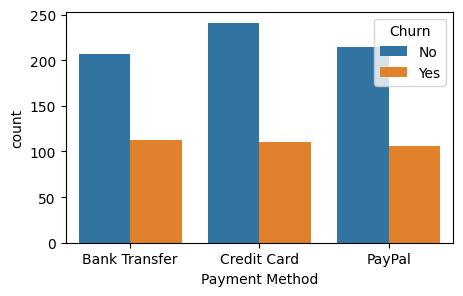

Crosstab of Contract Type vs Churn:
Churn           No  Yes  Total
Contract Type                 
Monthly        216  106    322
One-Year       222  104    326
Two-Year       224  118    342
Total          662  328    990



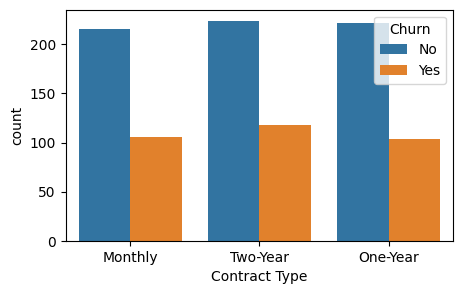

Crosstab of Internet Service vs Churn:
Churn              No  Yes  Total
Internet Service                 
DSL               215  101    316
Fiber Optic       223  106    329
No Internet       224  121    345
Total             662  328    990



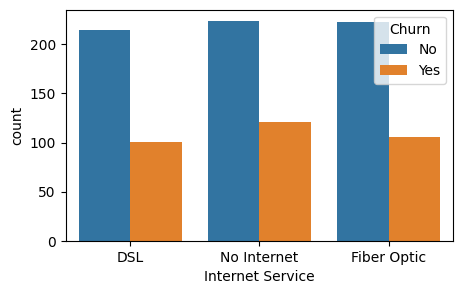

In [115]:
for i in ["Payment Method","Contract Type","Internet Service"]:
  result = pd.crosstab(df[i],df["Churn"],margins=True,margins_name="Total")
  print(f"Crosstab of {i} vs Churn:\n{result}\n")
  plt.figure(figsize=(5,3))
  sns.countplot(x=i,data=df,hue="Churn")
  plt.show()

**Which internet service provided highest number of customer support calls?**

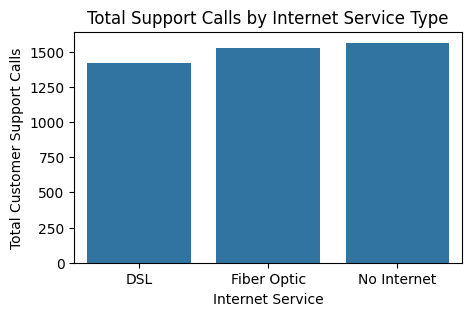

,Customer Support Calls
Internet Service,
DSL,1422
Fiber Optic,1525
No Internet,1563


In [116]:
result = df.groupby("Internet Service")["Customer Support Calls"].sum()


plt.figure(figsize=(5,3))
sns.barplot(x=result.index, y=result.values)
plt.xlabel("Internet Service")
plt.ylabel("Total Customer Support Calls")
plt.title("Total Support Calls by Internet Service Type")
plt.show()


result


# **Summary & Recommendations for Customer Churn Analysis**

### **Summary of Key Findings:**

Churn Rate is Imbalanced – 33.2% of customers churned, meaning retention is a challenge.

Contract Type Strongly Affects Churn –
Monthly contract customers have the highest churn rate.

One-Year and Two-Year contracts show much lower churn, suggesting long-term contracts increase retention.

Internet Service Type Impact –
Fiber Optic users had the highest churn rate.

DSL and No Internet customers had lower churn.

Payment Method Influence –
Electronic payments (PayPal, Credit Card, Bank Transfer) had higher churn rates.

Customers with automatic payments (e.g., bank transfers) seemed more stable.

Customer Support Calls & Churn –
Customers who made more support calls were more likely to churn, possibly due to service dissatisfaction.

### **Business Recommendations:**

✅Encourage Long-Term Contracts – Offer incentives (discounts, perks) to convert monthly subscribers to yearly plans.

✅ Improve Fiber Optic Service – Investigate complaints and technical issues causing higher churn in fiber users.

✅ Enhance Customer Support –

Reduce support call volume by introducing a self-service help portal or chatbots.

Improve first-call resolution to reduce repeat calls.

✅ Analyze Payment Behavior –
Promote auto-pay options to improve retention.

Consider discounts for prepaid or annual billing.